In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
data=pd.read_csv('gld_price_data.csv')

In [3]:
data.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [4]:
data.shape

(2290, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
correlation= data.corr()

C:\Users\koralsenturk\AppData\Local\Temp\ipykernel_14120\495501233.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation= data.corr()


<Axes: >

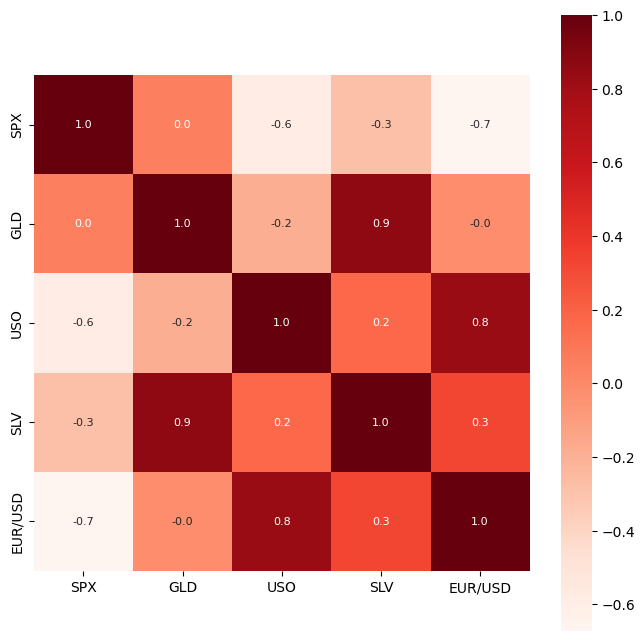

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

In [10]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\koralsenturk\AppData\Local\Temp\ipykernel_14120\3497747250.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'], color='blue')


<Axes: xlabel='GLD', ylabel='Density'>

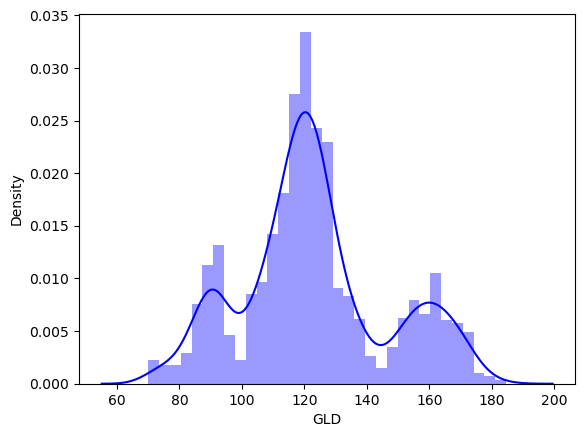

In [11]:
sns.distplot(data['GLD'], color='blue')

In [12]:
X=data.drop(['Date', 'GLD'],axis = 1)
Y=data['GLD']
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [14]:
regressor = RandomForestRegressor(n_estimators=100)

In [15]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [16]:
test_data_prediction = regressor.predict(X_test)

In [17]:
print(test_data_prediction)

[168.72329973  82.14179981 116.24020046 127.75190085 120.75180123
 154.71879746 150.11259896 126.09580047 117.44619872 125.92510077
 116.68580138 172.43750045 141.62189869 167.96469904 115.21479971
 117.53790046 137.48580309 170.44560125 158.85060352 160.32239964
 154.98160041 125.1493     175.76090008 157.03440295 125.24670063
  94.00649965  78.01779989 120.60230001 119.12939996 167.59129956
  88.19500037 125.47530009  91.3634011  117.70850036 121.17469897
 136.6702004  115.60850126 114.93710075 146.91449984 107.01110117
 104.24240231  87.37289809 126.47550052 118.08150037 152.46989917
 119.70019983 108.39900015 108.02669816  93.2406006  127.05369783
  75.06110045 113.66779937 121.59229997 111.36639893 118.88539922
 120.59029973 159.39890068 166.68060121 147.04929668  85.92419856
  94.31060026  86.78229874  90.50749995 118.87410082 126.45600084
 127.5126     168.94009961 122.14739949 117.35719874  98.38080048
 168.20140124 143.14999822 131.80360238 121.13190199 121.44009959
 119.57260

In [18]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R square error:", error_score)

R square error: 0.9892885497855847


In [19]:
Y_test = list(Y_test)

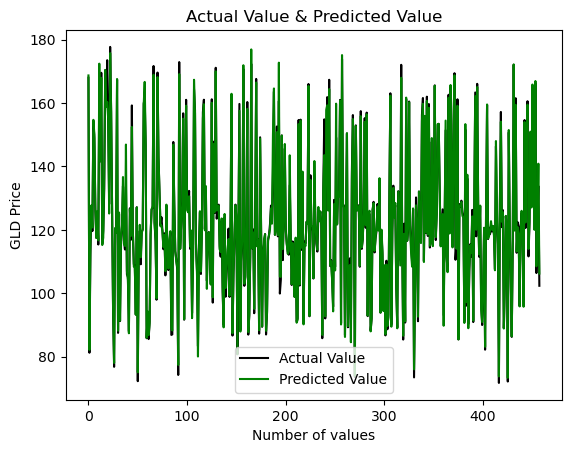

In [21]:
plt.plot(Y_test, color='black', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value' )
plt.title('Actual Value & Predicted Value')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()